In [1]:
import pandas as pd
import numpy as np

# Loading Datasets

In [2]:
train=pd.read_csv('E:train.csv')
test=pd.read_csv('E:test.csv')
sample=pd.read_csv('E:sample_submission.csv')

# Checking heads...

In [3]:

train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Get info...

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


# Get the summary statistics

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


# Read the data and analysis.(Check the shape, null values, Data types, EDA).


# Checking for shape of data....


In [6]:
train.shape

(381109, 12)

# Checking for null value....

In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Checking data type...

In [8]:
train.dtypes.head()

id                   int64
Gender              object
Age                  int64
Driving_License      int64
Region_Code        float64
dtype: object

In [9]:
train.select_dtypes(include="object").head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


#Here we have to convert the column Gender,Vehicle_Age and Vehicle_Damage in to flot/int dtype....

#By using map function......

In [10]:
train['Gender'].unique()



array(['Male', 'Female'], dtype=object)

In [11]:
g={'Male':1,'Female':0}
train['NGender']=train['Gender'].map(g)

In [12]:
train['Vehicle_Age'].unique()


array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [13]:
# By usging sklearn and LableEncoder.....

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb= LabelEncoder()

In [16]:
train['NVehicle_Age']=lb.fit_transform(train['Vehicle_Age'])

In [17]:
train['NVehicle_Age'].head()

0    2
1    0
2    2
3    1
4    1
Name: NVehicle_Age, dtype: int32

In [18]:
train['Vehicle_Damage'].unique()


array(['Yes', 'No'], dtype=object)

In [19]:
lb=LabelEncoder()

In [20]:
train['NVehicle_Damage']=lb.fit_transform(train['Vehicle_Damage'])

In [21]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,NGender,NVehicle_Age,NVehicle_Damage
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,2,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,2,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,1,0


In [22]:
lb.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [23]:
# Now we drope the chatacrical column.....

In [24]:
train.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Annual_Premium        381109 non-null  float64
 6   Policy_Sales_Channel  381109 non-null  float64
 7   Vintage               381109 non-null  int64  
 8   Response              381109 non-null  int64  
 9   NGender               381109 non-null  int64  
 10  NVehicle_Age          381109 non-null  int32  
 11  NVehicle_Damage       381109 non-null  int32  
dtypes: float64(3), int32(2), int64(7)
memory usage: 32.0 MB


In [26]:
x=train.drop('Response',axis=1)

# Here we observe the column Annual_Premium,Policy_Sales_Channel and Vintage having big values....
# we have to scaling here........

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
std=StandardScaler()

In [29]:
col=['Annual_Premium','Vintage','Policy_Sales_Channel']
train_scaler=x[col]

In [30]:
x[col]=std.fit_transform(train_scaler)

In [31]:
x.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,NGender,NVehicle_Age,NVehicle_Damage
0,1,44,1,28.0,0,0.574539,-1.587234,0.748795,1,2,1
1,2,76,1,3.0,0,0.172636,-1.587234,0.342443,1,0,0
2,3,47,1,28.0,0,0.449053,-1.587234,-1.521998,1,2,1
3,4,21,1,11.0,1,-0.113018,0.737321,0.581474,1,1,0
4,5,29,1,41.0,1,-0.178259,0.737321,-1.378580,0,1,0


In [32]:
x.isnull().sum()

id                      0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
NGender                 0
NVehicle_Age            0
NVehicle_Damage         0
dtype: int64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


# Now we have to check outliars in each column......

<AxesSubplot:xlabel='Vintage'>

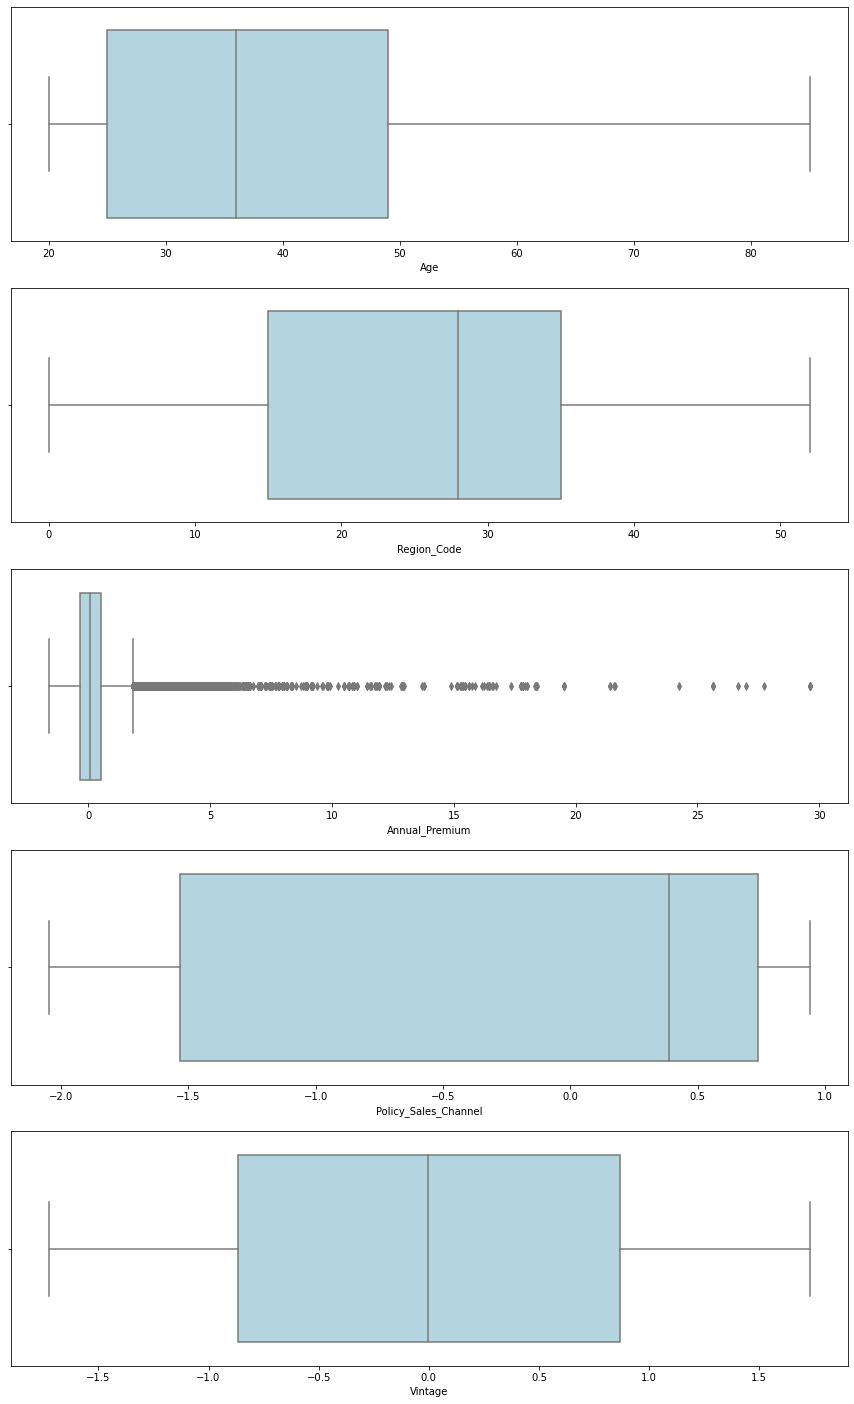

In [34]:
plt.figure(figsize=(15,25))
plt.subplot(5,1,1)
sns.boxplot(x=x.Age,color='lightblue')


plt.subplot(5,1,2)
sns.boxplot(x=x.Region_Code,color='lightblue')


plt.subplot(5,1,3)
sns.boxplot(x=x.Annual_Premium,color='lightblue')


plt.subplot(5,1,4)
sns.boxplot(x=x.Policy_Sales_Channel,color='lightblue')


plt.subplot(5,1,5)
sns.boxplot(x=x.Vintage,color='lightblue')

In [35]:
#Here we get outliar in the column of Annual primium.......

1.7660872148961324

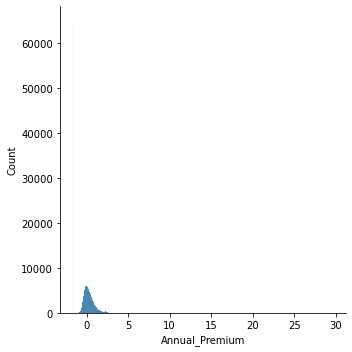

In [36]:
sns.displot(x['Annual_Premium'])
x['Annual_Premium'].skew()

In [37]:
#Removing Outlier from the column Annual_Premium......

In [38]:
x.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,NGender,NVehicle_Age,NVehicle_Damage
0,1,44,1,28.0,0,0.574539,-1.587234,0.748795,1,2,1
1,2,76,1,3.0,0,0.172636,-1.587234,0.342443,1,0,0
2,3,47,1,28.0,0,0.449053,-1.587234,-1.521998,1,2,1
3,4,21,1,11.0,1,-0.113018,0.737321,0.581474,1,1,0
4,5,29,1,41.0,1,-0.178259,0.737321,-1.378580,0,1,0


In [39]:
Q1=x.quantile(0.25)
Q3=x.quantile(0.75)
IQR= Q3-Q1

In [40]:
Q1

id                      95278.000000
Age                        25.000000
Driving_License             1.000000
Region_Code                15.000000
Previously_Insured          0.000000
Annual_Premium             -0.357831
Policy_Sales_Channel       -1.531887
Vintage                    -0.864663
NGender                     0.000000
NVehicle_Age                0.000000
NVehicle_Damage             0.000000
Name: 0.25, dtype: float64

In [41]:
Q3

id                      285832.000000
Age                         49.000000
Driving_License              1.000000
Region_Code                 35.000000
Previously_Insured           1.000000
Annual_Premium               0.513306
Policy_Sales_Channel         0.737321
Vintage                      0.868311
NGender                      1.000000
NVehicle_Age                 1.000000
NVehicle_Damage              1.000000
Name: 0.75, dtype: float64

In [42]:
IQR

id                      190554.000000
Age                         24.000000
Driving_License              0.000000
Region_Code                 20.000000
Previously_Insured           1.000000
Annual_Premium               0.871137
Policy_Sales_Channel         2.269208
Vintage                      1.732974
NGender                      1.000000
NVehicle_Age                 1.000000
NVehicle_Damage              1.000000
dtype: float64

In [43]:
x = x[~((x< (Q1 - 1.5*IQR))| (x >(Q3 +1.5*IQR)))]

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium'>

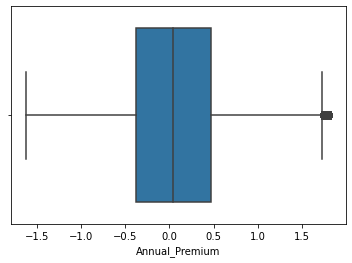

In [44]:
sns.boxplot(x['Annual_Premium'])

In [45]:
x.isnull().sum()

id                          0
Age                         0
Driving_License           812
Region_Code                 0
Previously_Insured          0
Annual_Premium          10320
Policy_Sales_Channel        0
Vintage                     0
NGender                     0
NVehicle_Age                0
NVehicle_Damage             0
dtype: int64

In [46]:
final_data=x.fillna(IQR)

In [47]:
final_data.isnull().sum()

id                      0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
NGender                 0
NVehicle_Age            0
NVehicle_Damage         0
dtype: int64

In [48]:
final_data.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,NGender,NVehicle_Age,NVehicle_Damage
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.002970,-0.002837,-0.000630,0.000999,-0.001345,-0.001507
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.059473,-0.577826,-0.001264,0.145545,-0.522300,0.267534
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011412,0.043731,-0.000848,-0.018374,0.030173,-0.016622
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.006232,-0.042420,-0.002750,0.000604,-0.027840,0.028235
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.010701,0.219381,0.002537,-0.081932,0.174783,-0.824143
Annual_Premium,0.002970,0.059473,-0.011412,-0.006232,0.010701,1.000000,-0.113660,-0.000833,0.002593,0.029694,0.004090
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113660,1.000000,0.000002,-0.111159,0.388551,-0.224377
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000833,0.000002,1.000000,-0.002517,0.002484,-0.002064
NGender,0.000999,0.145545,-0.018374,0.000604,-0.081932,0.002593,-0.111159,-0.002517,1.000000,-0.112625,0.091606
NVehicle_Age,-0.001345,-0.522300,0.030173,-0.027840,0.174783,0.029694,0.388551,0.002484,-0.112625,1.000000,-0.174238


<AxesSubplot:>

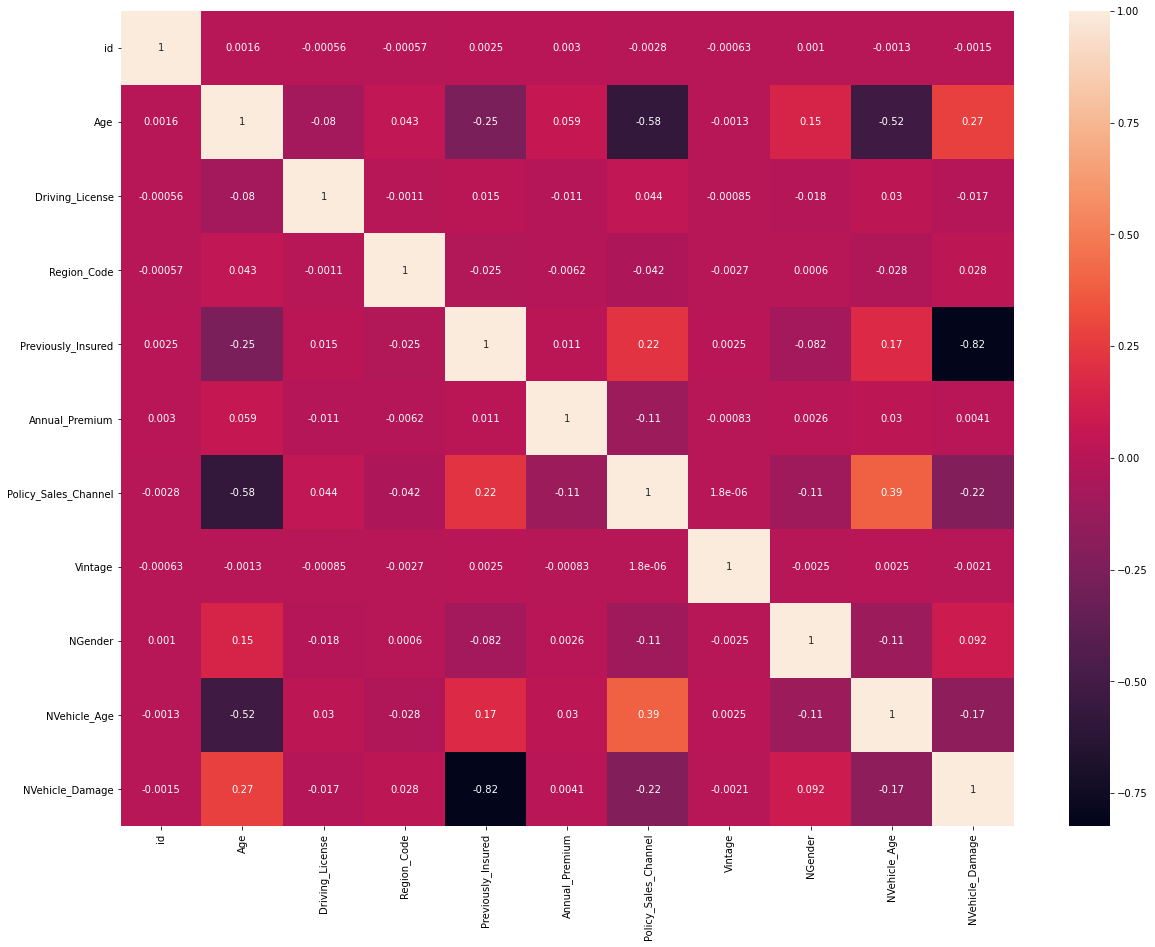

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(final_data.corr(),annot=True)

# Predict output by using LogisticRegrassion


In [50]:
x=final_data
y=train['Response']

In [51]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model=LogisticRegression()

In [54]:
model.fit(x,y)

LogisticRegression()

In [55]:
score=model.score(x,y)
score

0.877436638861848

In [67]:
pred_train=model.predict(x)
pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Checking Error....

In [72]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score

In [73]:
confusion_matrix(y,pred_train)


array([[334399,      0],
       [ 46710,      0]], dtype=int64)

In [74]:
accuracy_score(y,pred_train)

0.877436638861848

# Use Decision Tree Classifire for improving accuracy of model

In [77]:
from sklearn.tree import DecisionTreeClassifier


In [81]:
model1 = DecisionTreeClassifier(criterion='entropy')
model_training = model1.fit(x,y)
pred1 = model_training.predict(x)
pred1

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [82]:
confusion_matrix(y,pred1)


array([[334399,      0],
       [     0,  46710]], dtype=int64)

In [83]:
accuracy_score(y,pred1)

1.0

<AxesSubplot:>

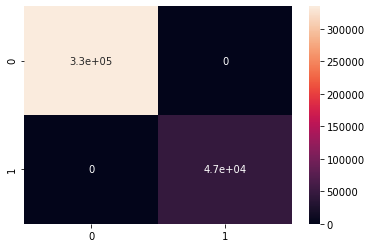

In [84]:
sns.heatmap(confusion_matrix(y,pred1),annot = True)

# Predicting Y(Responce) for Test Data..

In [59]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [60]:
test['NGender']=lb.fit_transform(test['Gender'])
test['NVehicle_Age']=lb.fit_transform(test['Vehicle_Age'])
test['NVehicle_Damage']=lb.fit_transform(test['Vehicle_Damage'])
test.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [61]:
test.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,NGender,NVehicle_Age,NVehicle_Damage
0,381110,25,1,11.0,1,35786.0,152.0,53,1,1,0
1,381111,40,1,28.0,0,33762.0,7.0,111,1,0,1
2,381112,47,1,28.0,0,40050.0,124.0,199,1,0,1
3,381113,24,1,27.0,1,37356.0,152.0,187,1,1,1
4,381114,27,1,28.0,1,59097.0,152.0,297,1,1,0


In [85]:
pred=model_training.predict(test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
df=pd.DataFrame(pred)
df.value_counts()

0    103744
1     23293
dtype: int64

# Exporting the output values along with id


In [89]:
result= pd.Series(data=pred,name='predicted_values')
final_result = pd.concat([sample['id'],result],axis=1)
final_result.to_csv('Prediction_HealthInsurance.csv')

In [90]:
pwd

'C:\\Users\\Admin\\Desktop\\TOP MENTOR\\Health Insurance project'